<a href="https://colab.research.google.com/github/adharangaonkar/DataScience_Projects/blob/master/wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red.csv


In [0]:
wines = pd.read_csv('winequality-red.csv')

In [11]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [8]:
!pip install conx

     |████████████████████████████████| 112kB 4.8MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 71kB 10.9MB/s 
     |████████████████████████████████| 71kB 11.3MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.1.0-cp36-none-any.whl size=88590 sha256=7f122151b70b63ec5cabc71622b1f1e6835253c0007ef6619a367dd997be592f
  Stored in directory: /root/.cache/pip/wheels/11/5e/47/167d9dfd5fa5850dd0cd3db80afe6db46e620edec3419dce5a
Successfully built cairocffi


In [9]:
import conx as cx

Using TensorFlow backend.
ConX, version 3.7.10


In [12]:
len(wines)

1599

In [48]:
labels = wines['quality'].values.astype(float)
labels[0:100]

array([5., 5., 5., 6., 5., 5., 5., 7., 7., 5., 5., 5., 5., 5., 5., 5., 7.,
       5., 4., 6., 6., 5., 5., 5., 6., 5., 5., 5., 5., 6., 5., 6., 5., 6.,
       5., 6., 6., 7., 4., 5., 5., 4., 6., 5., 5., 4., 5., 5., 5., 5., 5.,
       6., 6., 5., 6., 5., 5., 5., 5., 6., 5., 5., 7., 5., 5., 5., 5., 5.,
       5., 6., 6., 5., 5., 4., 5., 5., 5., 6., 5., 4., 5., 5., 5., 5., 6.,
       5., 6., 5., 5., 5., 5., 6., 5., 5., 4., 6., 5., 5., 5., 6.])

In [49]:
len(labels)

1599

In [50]:
labels.shape

(1599,)

In [28]:
set(labels)

{3, 4, 5, 6, 7, 8}

In [29]:
labels2 = map(lambda x: x - 3, labels)
labels2 = list(labels2)
set(labels2)

{0, 1, 2, 3, 4, 5}

In [51]:
wines.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [53]:
train = wines[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].values.astype(float)
np.shape(train)

(1599, 11)

In [32]:
train

array([[ 7.8    ,  0.88   ,  0.     , ...,  0.9968 ,  3.2    ,  0.68   ],
       [ 7.8    ,  0.76   ,  0.04   , ...,  0.997  ,  3.26   ,  0.65   ],
       [11.2    ,  0.28   ,  0.56   , ...,  0.998  ,  3.16   ,  0.58   ],
       ...,
       [ 6.3    ,  0.51   ,  0.13   , ...,  0.99574,  3.42   ,  0.75   ],
       [ 5.9    ,  0.645  ,  0.12   , ...,  0.99547,  3.57   ,  0.71   ],
       [ 6.     ,  0.31   ,  0.47   , ...,  0.99549,  3.39   ,  0.66   ]])

In [37]:
import conx as cx

wine = cx.Network("Wine Network")
wine.add(cx.Layer("input", 11))
wine.add(cx.Layer("hidden", 14, activation="relu"))
wine.add(cx.Layer("output", 6, activation="sigmoid"))
wine.connect()
wine.compile(error="mse", optimizer="adam")
wine.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 11)                0         
_________________________________________________________________
hidden (Dense)               (None, 14)                168       
_________________________________________________________________
output (Dense)               (None, 6)                 90        
Total params: 258
Trainable params: 258
Non-trainable params: 0
_________________________________________________________________



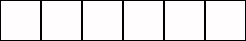

In [38]:
wine.picture()

In [54]:
wine.propagate(input= [6.9, 0.605, 0.12, 10.7, 0.073, 40, 83, 0.9993, 3.45, 0.52, 9.4])

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [55]:
for item in train[:10]:
    for pattern in [item]:
        print(pattern, wine.propagate(input=pattern), '\n')

[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ] [0.9999996423721313, 0.9999847412109375, 0.999982476234436, 0.9998681545257568, 0.9961318969726562, 0.9999982118606567] 

[ 7.8     0.88    0.      2.6     0.098  25.     67.      0.9968  3.2
  0.68    9.8   ] [1.0, 1.0, 1.0, 1.0, 0.9999823570251465, 1.0] 

[7.80e+00 7.60e-01 4.00e-02 2.30e+00 9.20e-02 1.50e+01 5.40e+01 9.97e-01
 3.26e+00 6.50e-01 9.80e+00] [1.0, 1.0, 1.0, 0.9999988079071045, 0.9998966455459595, 1.0] 

[11.2    0.28   0.56   1.9    0.075 17.    60.     0.998  3.16   0.58
  9.8  ] [1.0, 1.0, 1.0, 0.9999991655349731, 0.9999630451202393, 1.0] 

[ 7.4     0.7     0.      1.9     0.076  11.     34.      0.9978  3.51
  0.56    9.4   ] [0.9999996423721313, 0.9999847412109375, 0.999982476234436, 0.9998681545257568, 0.9961318969726562, 0.9999982118606567] 

[ 7.4     0.66    0.      1.8     0.075  13.     40.      0.9978  3.51
  0.56    9.4   ] [1.0, 0.999996542930603, 0.9999983310699463, 0

Since the output consists of 6 distinct cateogries, the classical way of handling this is with 6 output nodes.

So we need a 6-dimensional vector or outputs. So we one-hot encode the output variable.

In [56]:
labels3 = pd.get_dummies(labels2)
view = labels3.head(20)
view['val'] = labels2[:20]
view

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,0,1,2,3,4,5,val
0,0,0,1,0,0,0,2
1,0,0,1,0,0,0,2
2,0,0,1,0,0,0,2
3,0,0,0,1,0,0,3
4,0,0,1,0,0,0,2
5,0,0,1,0,0,0,2
6,0,0,1,0,0,0,2
7,0,0,0,0,1,0,4
8,0,0,0,0,1,0,4
9,0,0,1,0,0,0,2


Now let's build our dataset as a list of (input, label) pairs:

In [57]:
list(zip(train, labels3.values))
patterns = []

for i in range(0, len(train)):
    #inputs = list(np.vectorize(int)(train[i]))
    inputs = list(train[i])
    targets = list((labels3.values)[i])
    patterns.append((inputs, targets))
    
patterns[0:2]

[([7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4],
  [0, 0, 1, 0, 0, 0]),
 ([7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8],
  [0, 0, 1, 0, 0, 0])]

In [0]:
wine.dataset.load(patterns)

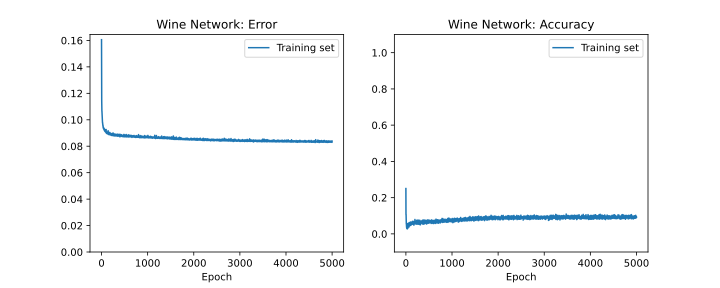

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 5000 |   0.08389 |   0.09188 


In [60]:
wine.reset()
wine.train(epochs=5000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

Let's try another network architecture with an extra hidden layer. So let's reduce the number of neurons in the old single hidden layer, to two layers, with 9 neurons for the first layer and 7 for the second.

In [61]:
wine2 = cx.Network("Wine Network Number 2")
wine2.add(cx.Layer("input", 11))
wine2.add(cx.Layer("hidden1", 9, activation="relu"))
wine2.add(cx.Layer("hidden2", 7, activation="relu"))
wine2.add(cx.Layer("output", 6, activation="sigmoid"))
wine2.connect()
wine2.compile(error="mse", optimizer="adam")
wine2.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 11)                0         
_________________________________________________________________
hidden1 (Dense)              (None, 9)                 108       
_________________________________________________________________
hidden2 (Dense)              (None, 7)                 70        
_________________________________________________________________
output (Dense)               (None, 6)                 48        
Total params: 226
Trainable params: 226
Non-trainable params: 0
_________________________________________________________________



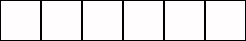
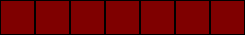

In [62]:
wine2.picture()

In [63]:
wine2.propagate(input= [6.9, 0.605, 0.12, 10.7, 0.073, 40, 83, 0.9993, 3.45, 0.52, 9.4])

[1.0,
 0.9999582767486572,
 1.0,
 5.1189581462551814e-09,
 0.9774502515792847,
 0.7254551649093628]

In [0]:
wine2.dataset.load(patterns)

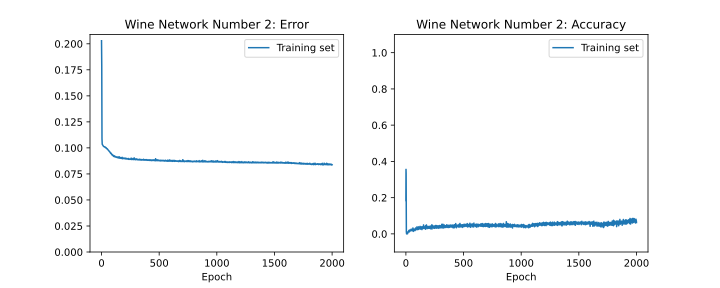

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 2000 |   0.08382 |   0.06262 


In [65]:
wine2.reset()
wine2.train(epochs=2000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

**Renormalize**, so that the ranges are the same

An accuracy of 6% is not enough. We need to make some changes in the training data

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler((-1,1))
features = min_max_scaler.fit_transform(train)
features

array([[-0.50442478, -0.20547945, -1.        , ...,  0.21259843,
        -0.7245509 , -0.69230769],
       [-0.43362832,  0.04109589, -1.        , ..., -0.27559055,
        -0.58083832, -0.56923077],
       [-0.43362832, -0.12328767, -0.92      , ..., -0.18110236,
        -0.61676647, -0.56923077],
       ...,
       [-0.69911504, -0.46575342, -0.74      , ...,  0.07086614,
        -0.49700599, -0.2       ],
       [-0.7699115 , -0.28082192, -0.76      , ...,  0.30708661,
        -0.54491018, -0.44615385],
       [-0.75221239, -0.73972603, -0.06      , ...,  0.02362205,
        -0.60479042, -0.2       ]])

In [67]:
list(zip(train2, labels3.values))
patterns = []

for i in range(0, len(train2)):
    #inputs = list(np.vectorize(int)(train2[i]))
    inputs = list(train2[i])
    targets = list((labels3.values)[i])
    patterns.append((inputs, targets))
    
patterns[0:2]

[([-0.5283596117263187,
   0.9618766712454476,
   -1.3914722776605752,
   -0.45321840673805114,
   -0.24370668659232994,
   -0.46619251712773346,
   -0.3791326888959121,
   0.5582744625310315,
   1.288642916709892,
   -0.5792065221278776,
   -0.9602461068866388],
  [0, 0, 1, 0, 0, 0]),
 ([-0.2985474337867381,
   1.9674424541409123,
   -1.3914722776605752,
   0.0434161447934977,
   0.22387519619714352,
   0.8726382318679612,
   0.6243632277859998,
   0.028260767740996406,
   -0.7199332966852555,
   0.1289504006827337,
   -0.5847771110347696],
  [0, 0, 1, 0, 0, 0])]

In [0]:
wine2.dataset.load(patterns)

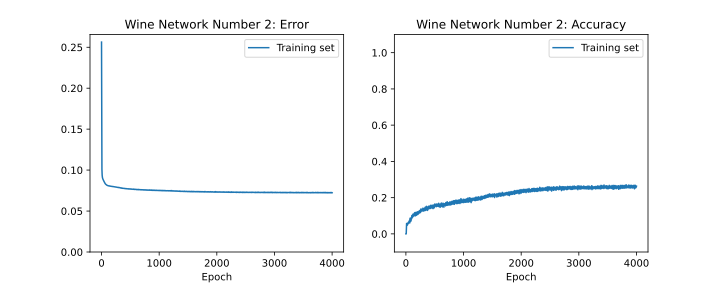

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 4000 |   0.07236 |   0.26325 


In [70]:
wine2.reset()
wine2.train(epochs=4000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)

Though we have reduced the error and increased the accuracy to 26% it is still not enough

We will try to do PCA on the dataset

# **PCA**

In [0]:
from sklearn.decomposition import PCA
from scipy.stats import multivariate_normal

In [76]:
type(train)

numpy.ndarray

In [79]:
features = pd.DataFrame(train2)
features.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246


In [0]:
import numpy as np

pca = PCA(n_components = 3)
pca.fit(features)
p = pca.transform(features)

# wines['P1'] = np.zeros(len(wines))
# wines['P1'][0] = "First principal component"
# wines['P1'][1:] = p[:,0]

# wines['P2'] = np.zeros(len(wines))
# wines['P2'][0] = "Second principal component"
# wines['P2'][1:] = p[:,1]

# wines['P3'] = np.zeros(len(wines))
# wines['P3'][0] = "Third principal component"
# wines['P3'][1:] = p[:,2]

# wines.head()

In [94]:
len(p)

1599

In [95]:
p.shape

(1599, 3)

In [96]:
type(p)

numpy.ndarray

In [97]:
list(zip(p, labels3.values))
patterns = []

for i in range(0, len(p)):
    #inputs = list(np.vectorize(int)(p[i]))
    inputs = list(p[i])
    targets = list((labels3.values)[i])
    patterns.append((inputs, targets))
    
patterns[0:2]

[([-1.6195298795505444, 0.45095009168254147, -1.774454148278278],
  [0, 0, 1, 0, 0, 0]),
 ([-0.7991699349768139, 1.8565530606750646, -0.9116901661810598],
  [0, 0, 1, 0, 0, 0])]

In [110]:
wine3 = cx.Network("Wine Network Number 2")
wine3.add(cx.Layer("input", 3))
wine3.add(cx.Layer("hidden1", 5, activation="relu"))
wine3.add(cx.Layer("hidden2", 8, activation="relu"))
wine3.add(cx.Layer("hidden3", 8, activation="relu"))
wine3.add(cx.Layer("hidden4", 7, activation="relu"))
wine3.add(cx.Layer("output", 6, activation="sigmoid"))
wine3.connect()
wine3.compile(error="mse", optimizer="adam")
wine3.summary()

Model: "model_99"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           (None, 3)                 0         
_________________________________________________________________
hidden1 (Dense)              (None, 5)                 20        
_________________________________________________________________
hidden2 (Dense)              (None, 8)                 48        
_________________________________________________________________
hidden3 (Dense)              (None, 8)                 72        
_________________________________________________________________
hidden4 (Dense)              (None, 7)                 63        
_________________________________________________________________
output (Dense)               (None, 6)                 48        
Total params: 251
Trainable params: 251
Non-trainable params: 0
____________________________________________________________

In [111]:
wine3.propagate(input= [6.9, 0.605, 0.12])

[0.4904596507549286,
 0.5385128855705261,
 0.44232672452926636,
 0.444521963596344,
 0.6332236528396606,
 0.4978023171424866]

In [0]:
wine3.dataset.load(patterns)

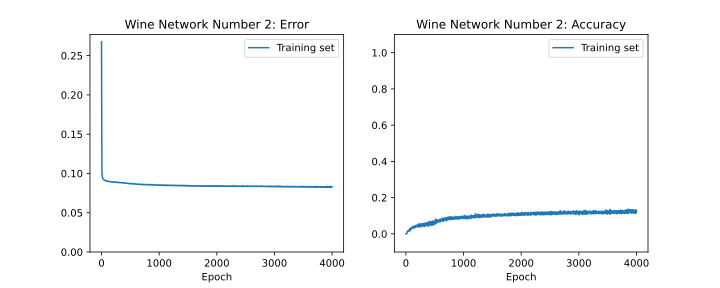

       |  Training |  Training 
Epochs |     Error |  Accuracy 
------ | --------- | --------- 
# 4000 |   0.08288 |   0.12760 


In [113]:
wine3.reset()
wine3.train(epochs=4000, accuracy=.75, tolerance=.2, report_rate=100, plot=True)